In [15]:
import xarray as xr 
import matplotlib.pyplot as plt
import pandas as pd
from pyclim_noresm.general_util_funcs import global_avg
import matplotlib
import matplotlib as mpl
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
import cartopy.crs as ccrs 
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator
import numpy as np
from tools import global_map
matplotlib.rcParams.update({'font.size': 14})

In [4]:
model_paths = {
    'CNRM-ESM2-1':'../results/piClim-2xdust/ERFtlw/ERFtlw_piClim-2xdust_CNRM-ESM2-1_Ayear.nc',
    'EC-Earth3-AerChem':'../results/piClim-2xdust/ERFtlw/ERFtlw_piClim-2xdust_EC-Earth3-AerChem_Ayear.nc',
    'GFDL-ESM4':'../results/piClim-2xdust/ERFtlw/ERFtlw_piClim-2xdust_GFDL-ESM4_Ayear.nc',
    'GISS-E2-1-G':'../results/piClim-2xdust/ERFtlw/ERFtlw_piClim-2xdust_GISS-E2-1-G_Ayear.nc',
    'IPSL-CM6A-LR-INCA':'../results/piClim-2xdust/ERFtlw/ERFtlw_piClim-2xdust_IPSL-CM6A-LR-INCA_Ayear.nc',
    'NorESM2-LM':'../results/piClim-2xdust/ERFtlw/ERFtlw_piClim-2xdust_NorESM2-LM_Ayear.nc',
    'MIROC6':'../results/piClim-2xdust/ERFtlw/ERFtlw_piClim-2xdust_MIROC6_Ayear.nc',
    'UKESM1-0-LL':'../results/piClim-2xdust/ERFtlw/ERFtlw_piClim-2xdust_UKESM1-0-LL_Ayear.nc',
    'MPI-ESM-1-2-HAM':'../results/piClim-2xdust/ERFtlw/ERFtlw_piClim-2xdust_MPI-ESM-1-2-HAM_Ayear.nc'
}



In [5]:
dsets = []
for key,path in model_paths.items():
    ds = xr.open_dataset(path)
    ds = global_avg(ds['ERFtlw'])
    ds = ds.assign_coords(year=range(1,len(ds.year)+1))
    ds = ds.to_dataset(name=f'{key}')
    dsets.append(ds)

In [6]:
ds = xr.merge(dsets)

df = ds.to_dataframe()

In [7]:
df['Multi-model'] = df.mean(axis=1)
mean_ERF = df.mean()
erf_std = df.std()



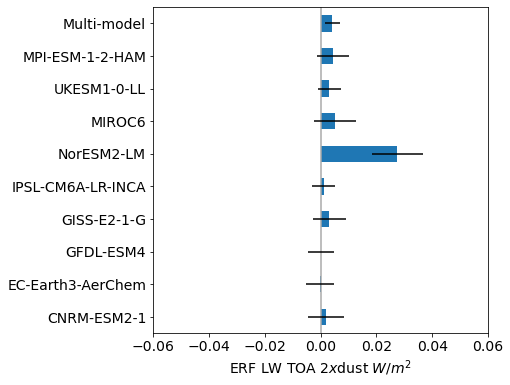

In [9]:
fig, ax = plt.subplots(figsize=(6,6))
ax.axvline(color='darkgrey')
mean_ERF.plot.barh(ax=ax,xerr=erf_std)
ax.set_xlim(-0.06,0.06)
ax.set_xlabel('ERF LW TOA 2$x$dust $W/m^2$')
plt.savefig('../figs/glob_mean_ERF_lw.png', facecolor='white')

Most models does not show any forcing changes from a doubling of dust. Thus adding 3 more models does not change the previous conclusions.

In [10]:
dsets = {}
for key,path in model_paths.items():
    ds = xr.open_dataset(path)
    # ds = global_avg(ds['ERFt'])
    std = ds['ERFtlw'].std(dim='year').to_dataset(name=f'{key}_std')
    mean = ds['ERFtlw'].mean(dim='year').to_dataset(name=f'{key}')
    ds = xr.merge([std,mean])
    # ds = ds.to_dataset(name=f'{key}')
    dsets[key] =ds

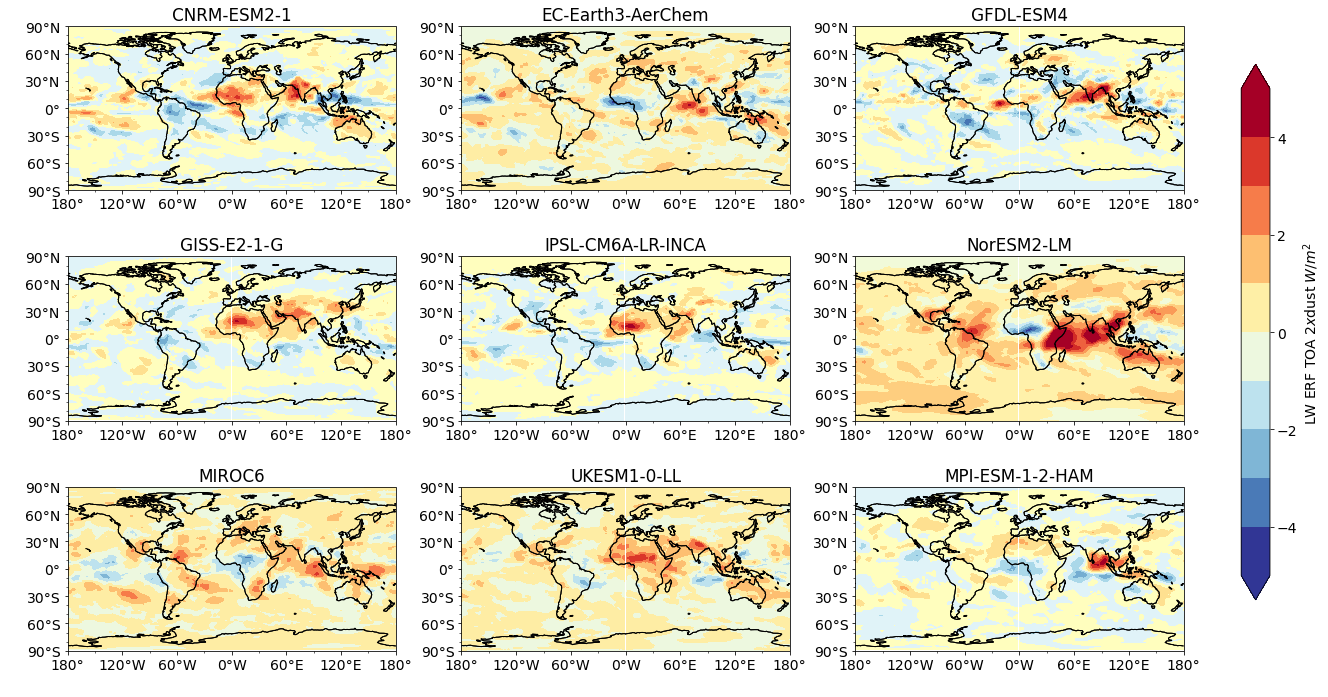

In [16]:
fig, ax = plt.subplots(ncols=3,nrows=3, subplot_kw={'projection':ccrs.PlateCarree()}, figsize=(20,12))
for key, ax_i in zip(dsets,ax.ravel()):
    dsets[key][key].plot.contourf(ax=ax_i,levels=np.linspace(-5,5,11),cmap='RdYlBu_r', add_colorbar=False)
    ax_i.coastlines()
    ax_i.set_title(key)
    global_map(ax_i)
cax = fig.add_axes([0.94,0.2,0.02,0.62])
cmap = mpl.cm.RdYlBu_r
fig.colorbar(mpl.cm.ScalarMappable(mpl.colors.BoundaryNorm(np.linspace(-5,5,11),cmap.N),cmap), cax=cax, extend='both', 
             label='LW ERF TOA 2$x$dust $W/m^2$')
plt.savefig('../figs/ERFtlw_CMIP6.png', dpi=144, facecolor='white')